In [1]:
#importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# let's read the data
df = pd.read_csv('car_data.csv')

In [3]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591,19.184713,6.012739,232.073248,3215.191083,14.757962,72.146497,1.43949
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664,5.909382,1.815133,120.030803,967.364627,2.924589,1.462415,0.71913
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.00000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707,14.000000,4.000000,113.000000,2300.000000,13.000000,71.000000,1.00000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917,18.000000,6.000000,232.000000,3121.000000,14.500000,72.000000,1.00000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878,24.000000,8.000000,350.000000,4129.000000,16.500000,73.000000,2.00000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,35.000000,8.000000,455.000000,5140.000000,23.500000,75.000000,3.00000


In [4]:
#we came to know that,we have three data types in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Dealing with missing or Null value

In [5]:
#drop the values which are not necessary
df=df.drop(["Manufacturer","Sales_in_thousands","Vehicle_type","__year_resale_value","Fuel_efficiency","Latest_Launch","mpg","cylinders","displacement","weight","acceleration","model year","origin"],axis=1)

In [6]:
#Fill the null values with mean
df["Price_in_thousands"].fillna(value=df["Price_in_thousands"].mean(),inplace=True)
df["Engine_size"].fillna(value=df["Engine_size"].mean(),inplace=True)
df["Horsepower"].fillna(value=df["Horsepower"].mean(),inplace=True)
df["Wheelbase"].fillna(value=df["Wheelbase"].mean(),inplace=True)
df["Width"].fillna(value=df["Width"].mean(),inplace=True)
df["Length"].fillna(value=df["Length"].mean(),inplace=True)
df["Fuel_capacity"].fillna(value=df["Fuel_capacity"].mean(),inplace=True)
df["Curb_weight"].fillna(value=df["Curb_weight"].mean(),inplace=True)
df["Power_perf_factor"].fillna(value=df["Power_perf_factor"].mean(),inplace=True)

In [7]:
df.isna().sum()
#now we do not have null values 

Model                 0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Power_perf_factor     0
dtype: int64

Dealing with categorical values

In [8]:
#I need to convert the categorical values into integers
# here i'm ordering car models on counting one by one and making dict using car Model as key and encoded values

encoded_Model = {k:v for v, k in enumerate(df.Model.value_counts().sort_values().index, 0)}
#now map this encoded values with car Model
df.Model = df.Model.map(encoded_Model)

In [9]:
df

,Model,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Power_perf_factor
0,98,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,58.280150
1,37,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,91.370778
2,2,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,77.043591
3,3,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,91.389779
4,4,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,62.777639
...,...,...,...,...,...,...,...,...,...,...
152,152,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,66.498812
153,153,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,70.654495
154,137,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,71.155978
155,145,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,101.623357


let's see relation among attributes

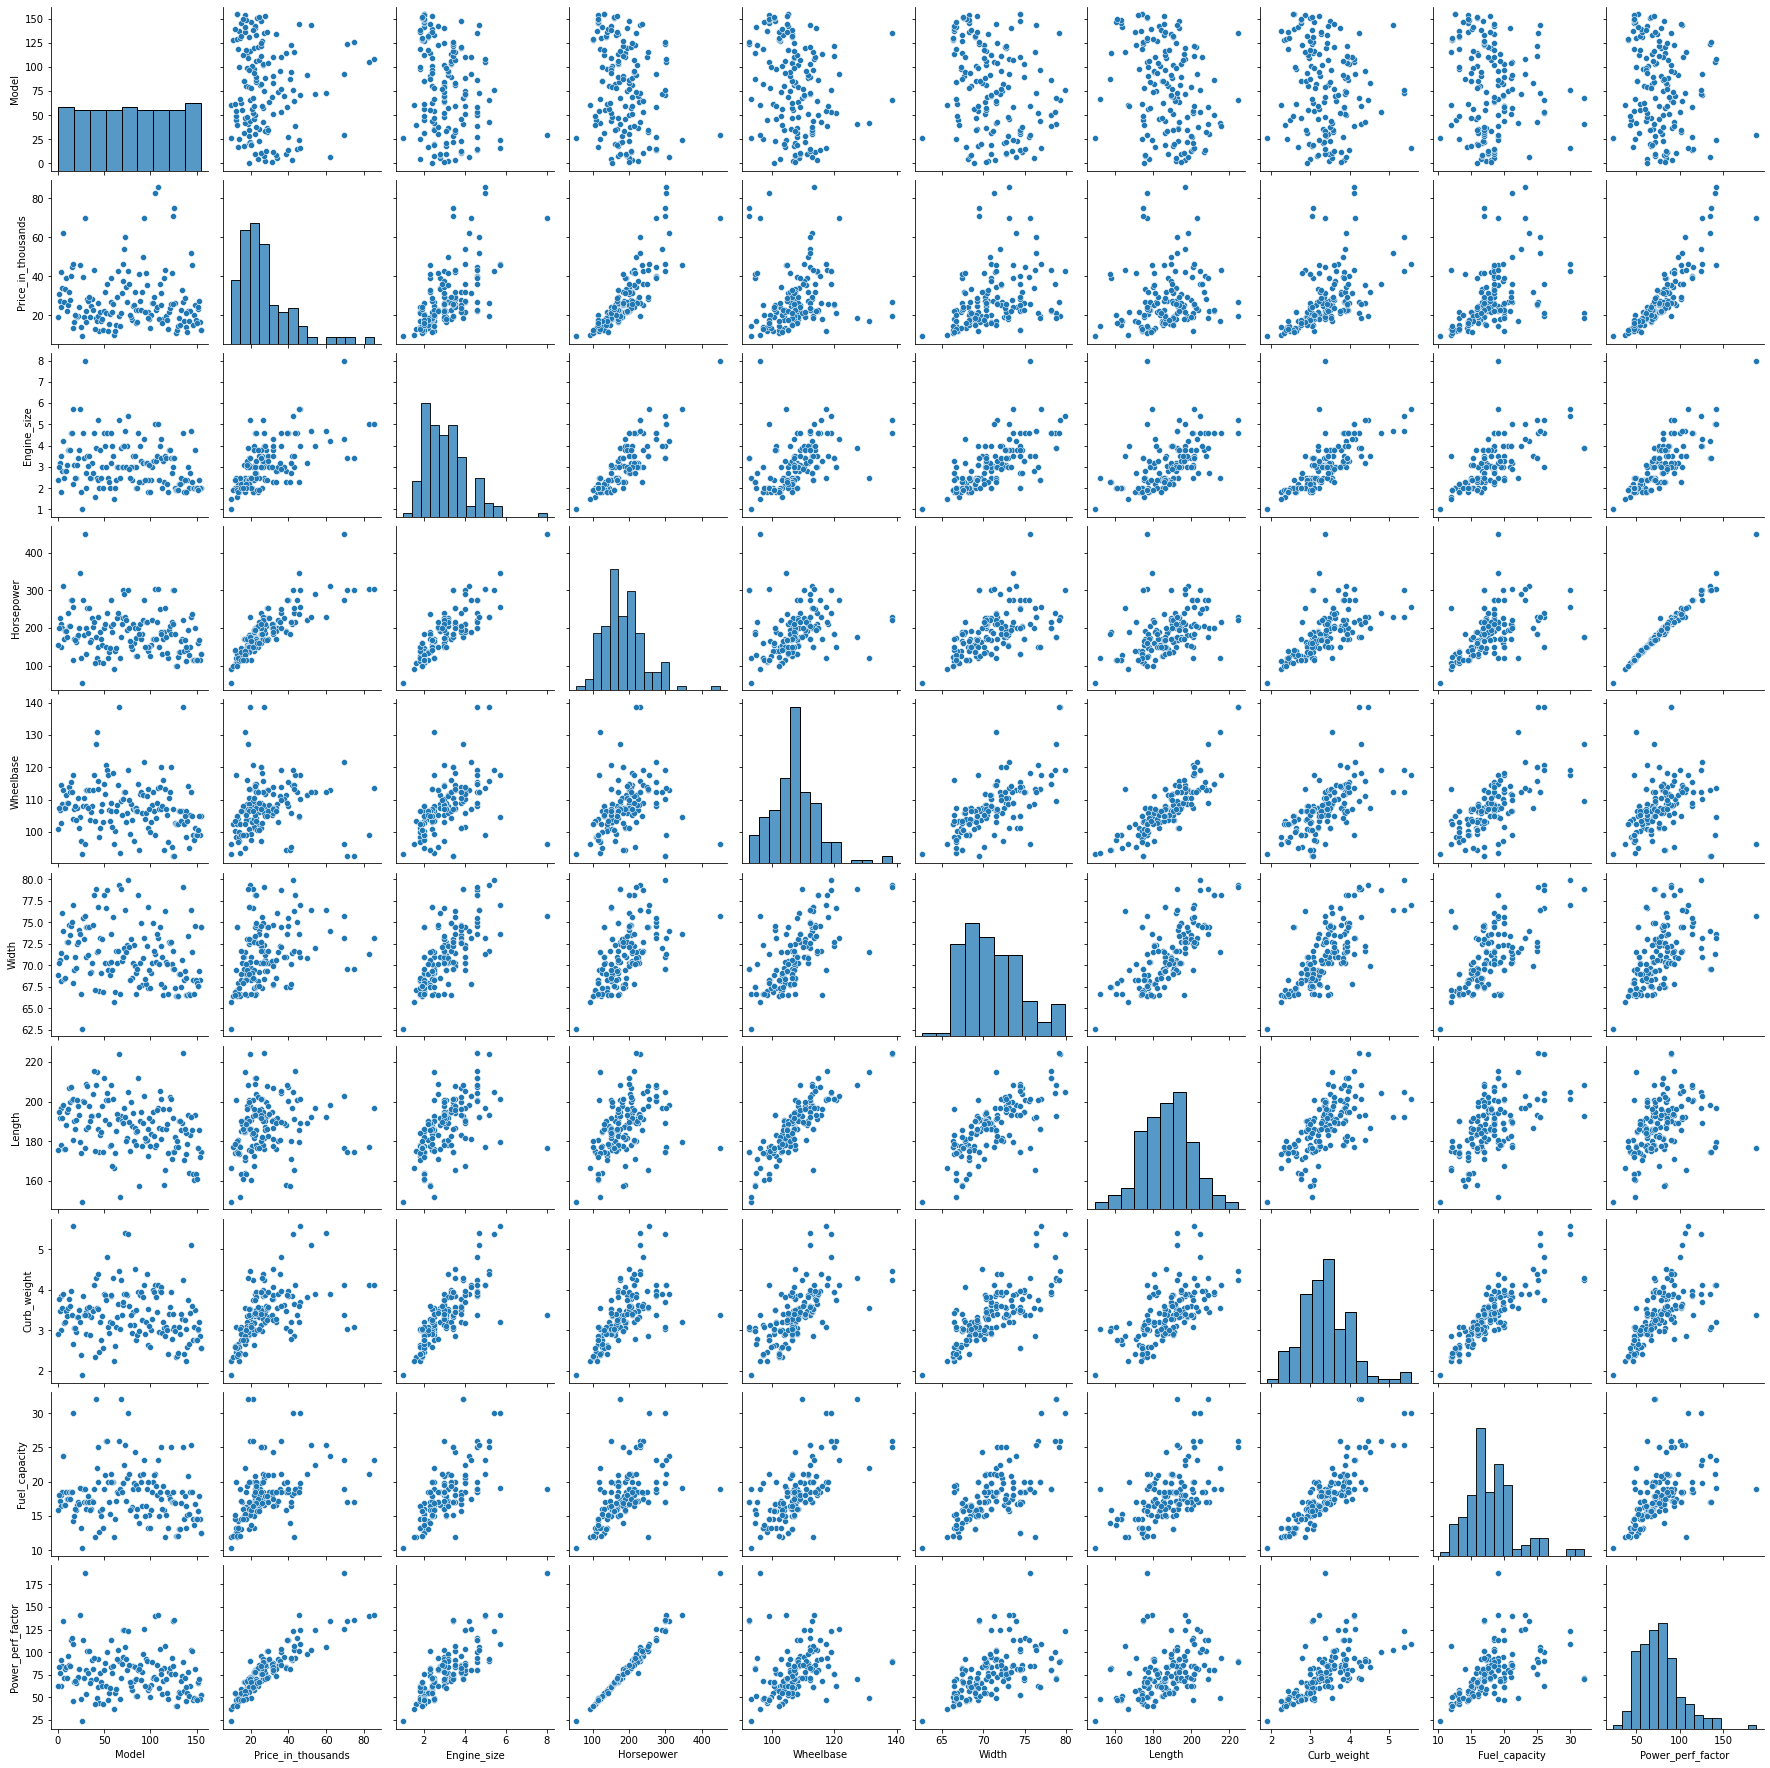

In [22]:
sns.pairplot(df)

In [10]:
df.corr()['Engine_size']

Model                -0.260484
Price_in_thousands    0.626839
Engine_size           1.000000
Horsepower            0.837360
Wheelbase             0.472130
Width                 0.690398
Length                0.541424
Curb_weight           0.754668
Fuel_capacity         0.663022
Power_perf_factor     0.818481
Name: Engine_size, dtype: float64

Goal
- I want to predict the engine size of the car 
- Here target variable is engine_size

lets divide the train and test data

In [11]:
x=df.drop("Engine_size",axis=1)
y=df["Engine_size"]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

standardization

In [13]:
scaler=StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

Model Building

In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [15]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {}
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(random_state=22),
            'params': {
                'criterion': ['squared_error','friedman_mse','absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,20,5)],
                'min_samples_leaf': [1, 2, 5]
            }
        },
        
        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.random.randint(20,151,size=5),
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10,100],
                'min_samples_leaf': [1, 2]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=3)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [16]:
 perfect_model(x, y)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{}, {'splitter': 'random', 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'absolute_error'}, {'n_estimators': 49, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15}]


,model,best_score,best_params
0,Linear_Regression,-11.838541,{}
1,Decision_Tree,0.469283,"{'splitter': 'random', 'min_samples_leaf': 5, ..."
2,Random_forest,0.581594,"{'n_estimators': 49, 'min_samples_split': 10, ..."


In [17]:
final_rf_model = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_depth=20)
final_rf_model.fit(x_train,y_train)
final_rf_model.score(x_test,y_test)

0.7942978566928229

In [18]:
final_lr_model = LinearRegression()
final_lr_model.fit(x_train,y_train)
final_lr_model.score(x_test,y_test)

0.8115678896326277

In [19]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=20, criterion='absolute_error')
final_dec_model.fit(x_train,y_train)
final_dec_model.score(x_test,y_test)

0.7156741928742999

In [20]:
#let's find out mean square error, root mean square error and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = final_rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Square Error: 0.27911528184624934
Root Mean Square Error: 0.5283136207275461
Mean Absolute Error: 0.39829519629675963


- I got 81% accuracy through LinearRegression model
- Therefore,I am taking Linear Regression as my final model

In [21]:
def prediction(Model,Price_in_thousands,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Power_perf_factor):
    X_pred = np.zeros(9)
    X_pred[0]=encoded_Model[Model]
    X_pred[1]=Price_in_thousands
    X_pred[2]=Horsepower
    X_pred[3]=Wheelbase
    X_pred[4]=Width
    X_pred[5]=Length
    X_pred[6]=Curb_weight
    X_pred[7]=Fuel_capacity
    #X_pred[8]=Fuel_efficiency
    X_pred[8] = Power_perf_factor
    X_pred = scaler.transform([X_pred])
    prediction = final_lr_model.predict(X_pred)
    return prediction

In [22]:
#let's save the linear regression model and scaler in the form pickle file

import pickle
with open('engine_size_model.pkl','wb') as file:
    pickle.dump(final_rf_model,file)
    
with open("scaler_engine_size.pickle","wb") as file:
    pickle.dump(scaler,file)